<a href="https://colab.research.google.com/github/yangyeji2020311166/ML/blob/main/USL_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

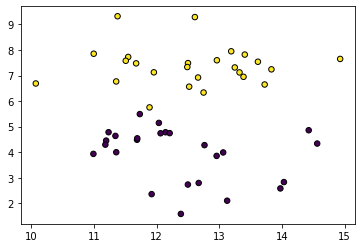

In [1]:
# 1) Original dataset에 Transformer preprocessing적용해보기
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

X,y=make_blobs(n_samples=50,centers=2, random_state=4,cluster_std=1)
X+=3

plt.scatter(X[:,0],X[:,1],c=y,s=30,edgecolors='black')

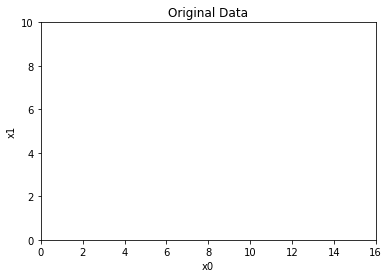

In [2]:
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

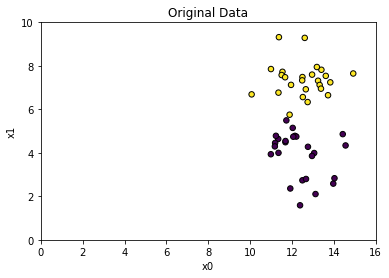

In [3]:
# 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

X,y=make_blobs(n_samples=50,centers=2, random_state=4,cluster_std=1)
X+=3

plt.scatter(X[:,0],X[:,1],c=y,s=30,edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

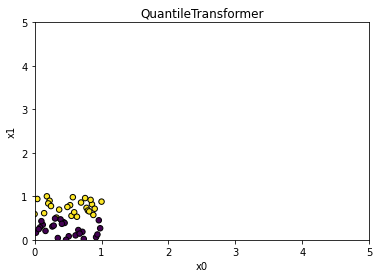

In [4]:
# 1) QuantileTransformer 적용
# 랜덤하게 흩어져 있던 데이터 포인트들이 두 특성의 0과 1사이에 고르게 분포됨.

# scaler=QuantileTransformer(n_quantiles=1000)명령어 사용시 아래와 같은 경고발생
# UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.  % (self.n_quantiles, n_samples))

scaler=QuantileTransformer(n_quantiles=50) # or scaler=QuantileTransformer()가능
X_trans=scaler.fit_transform(X)

plt.scatter(X_trans[:,0],X_trans[:,1],c=y,s=30,edgecolors='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

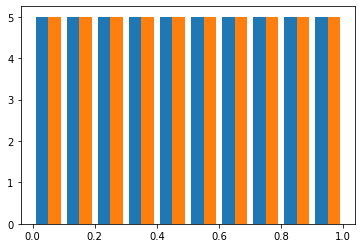

In [5]:
# 랜덤하게 흩어져 있던 데이터 포인트들이 두 특성의 0과 1사이에 고르게 분포되어 있음.
# 변환된 데이터의 히스토그램을 그려보면 균등 분포를 쉽게 확인가능
plt.hist(X_trans)
plt.show()

In [6]:
# QuantileTransformer의 분위 수는 n_quantiles 매개변수에서 설정할 수 있으며 기본값은 1,000
# scaler객체의 quantiles_속성에는 특성별로 계산된 분위 값이 들어 있으므로 이 속성의 크기는 (n_quantiles, n_features)
print(scaler.quantiles_.shape)


(50, 2)


In [7]:
# 2) Simpe dataset (i.e., 하나의 특성과 다섯 개의 샘플)에 Transformer preprocessing적용해보기
x=np.array([[0],[5],[8],[9],[10]])
x

array([[ 0],
       [ 5],
       [ 8],
       [ 9],
       [10]])

In [8]:
# np.percentile()함수는 두 번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환함.
# 예) 첫 번째, 1사분위, 중간값, 3사분위, 마지막 값을 지정
# 훈련 샘플이 모두 다섯 개 이므로 지정한 분위가 훈련 샘플과 정확히 일치함
print(np.percentile(x[:,0],[0,25,50,75,100]))

[ 0.  5.  8.  9. 10.]


In [9]:
x_trans=QuantileTransformer(n_quantiles=5).fit_transform(x)
print(np.percentile(x_trans[:,0],[0,25,50,75,100]))

[0.   0.25 0.5  0.75 1.  ]


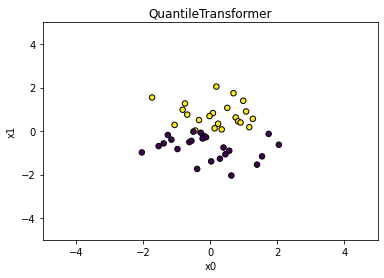

In [10]:
# QuantileTransformer는 output_distribution 매개변수에서 normal로 지정하여 균등 분표가 아니라 정규분포로 출력 변경가능
scaler=QuantileTransformer(output_distribution='normal',n_quantiles=50)
X_trans=scaler.fit_transform(X)

plt.scatter(X_trans[:,0],X_trans[:,1],c=y,s=30,edgecolors='black')
plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

(50, 2)


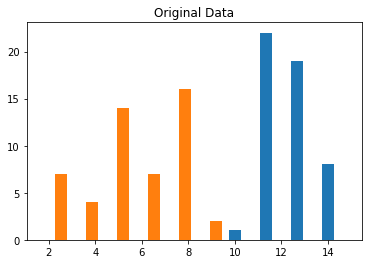

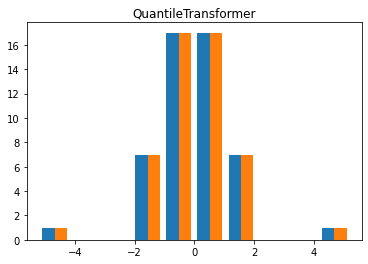

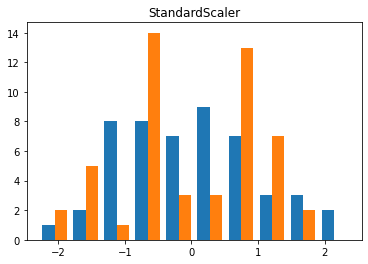

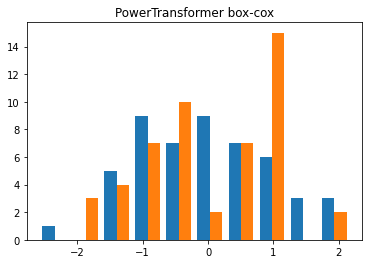

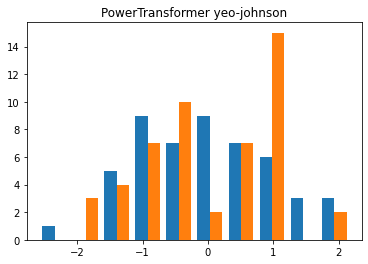

In [11]:
# Original Data
print(X.shape)
plt.hist(X)
plt.title("Original Data")
plt.show()

# QuantileTransformer는 output_distribution 매개변수에서 normal로 지정하여 균등 분표가 아니라 정규분포로 출력 변경가능
X_trans=QuantileTransformer(output_distribution='normal',n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title("QuantileTransformer")
plt.show()

# StandardScaler
X_trans=StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title("StandardScaler")
plt.show()

# scikit-learn 0.20.0버전에서는 데이터의 특성별로 정규분포 형태에 가깝도록 변환해주는 PowerTransformer가 추가됨.
# PowerTransformer는 method매개변수에 'yeo-johnson'과 'box-cox'알고리즘을 지정할 수 있음. 기본값은 'yeo-johnson'임.
X_trans=PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title("PowerTransformer box-cox")
plt.show()

X_trans=PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title("PowerTransformer yeo-johnson")
plt.show()